# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

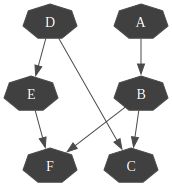

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(1e-10,False,False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.388748 , 0.611252] , [0.388226 , 0.611774]]

B:Range([0,1])
<A:0> : [[0.313659 , 0.686341] , [0.311745 , 0.688255]]
<A:1> : [[0.420476 , 0.579524] , [0.420166 , 0.579834]]

C:Range([0,1])
<B:0|D:0> : [[0.191514 , 0.808486] , [0.163758 , 0.836242]]
<B:1|D:0> : [[0.82499 , 0.175009]]
<B:0|D:1> : [[0.397873 , 0.602127] , [0.397424 , 0.602576]]
<B:1|D:1> : [[0.484422 , 0.515578] , [0.48431 , 0.51569]]

D:Range([0,1])
<> : [[0.800244 , 0.199756] , [0.800242 , 0.199758]]

E:Range([0,1])
<D:0> : [[0.616013 , 0.383987] , [0.615997 , 0.384003]]
<D:1> : [[0.181977 , 0.818023] , [0.124217 , 0.875783]]

F:Range([0,1])
<E:0|B:0> : [[0.723521 , 0.276479] , [0.723517 , 0.276483]]
<E:1|B:0> : [[0.794577 , 0.205423] , [0.794576 , 0.205424]]
<E:0|B:1> : [[0.701076 , 0.298924] , [0.701071 , 0.298929]]
<E:1|B:1> : [[0.572622 , 0.427378] , [0.572593 , 0.427407]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta,False,False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [8]:
for eps in [1,1e-1,1e-2,1e-3,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()